In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases

# for table comparison
from deepdiff import DeepDiff


# for plots to appear directly below the cell in which they are called
%matplotlib inline

# Read csv files and remove duplicates

In [5]:
# Pandas defaults encoding is UTF-8 which does not work for CSV files
# To find encodings that work

# Creating a set of all available encodings
alias_values = set(aliases.values())

for encoding in alias_values:
  try:
    df = pd.read_csv("archive/shopping_behavior_updated.csv", nrows = 10, encoding = encoding) # read only 10 lines for speed
    print('successful', encoding)
  except:
    pass

# Below are the following encodings that can be used

successful utf_16_le
successful cp865
successful cp437
successful iso2022_jp_2004
successful shift_jis
successful iso8859_16
successful latin_1
successful ptcp154
successful iso8859_5
successful cp1250
successful iso8859_7
successful iso2022_jp_3
successful cp864
successful cp857
successful hz
successful shift_jis_2004
successful cp1255
successful iso8859_9
successful cp1252
successful cp1253
successful cp950
successful euc_jisx0213
successful iso8859_2
successful iso8859_6
successful iso2022_jp_ext
successful iso8859_3
successful cp850
successful cp866
successful gb2312
successful iso8859_13
successful iso8859_8
successful utf_16_be
successful hp_roman8
successful kz1048
successful big5
successful iso2022_jp_1
successful gbk
successful mac_cyrillic
successful cp863
successful iso2022_jp_2
successful cp852
successful shift_jisx0213
successful mac_roman
successful iso8859_15
successful cp862
successful cp775
successful cp869
successful cp1254
successful iso8859_14
successful cp861
succe

In [6]:
# Read the shopping_behavior_updated.csv file
shopping_behavior = pd.read_csv("archive/shopping_behavior_updated.csv", encoding = "iso8859_11")

# Read the shopping_trends.csv file
shopping_trends = pd.read_csv("archive/shopping_trends.csv", encoding = "iso8859_11")

In [7]:
# Quick check the beginning of the shopping_behavior table
shopping_behavior.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [8]:
# Quick check the beginning of the shopping_trends table
shopping_trends.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [10]:
# Return the shape of the shopping_behavior table
shopping_behavior.shape

(3900, 18)

In [11]:
# Return the shape of the shopping_trends table
shopping_trends.shape

(3900, 19)

In [12]:
# Counting the duplicated rows in the shopping_behavior table
shopping_behavior.duplicated().sum()

0

In [13]:
# Counting the duplicated rows in the shopping_trends table
shopping_trends.duplicated().sum()

0

Both the shopping_trends table and the shopping_behavior tables have been read, and contain no duplicated rows to be cleaned.

.drop_duplicates(inplace=TRUE) would've been used to remove the duplicates from the table.

# Explore the dataset

In [14]:
shopping_behavior

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [15]:
shopping_trends

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [20]:
# Identify differences between the 2 datasets
diff = DeepDiff(shopping_behavior,shopping_trends)
print(diff)

{'values_changed': {'root[12]': {'new_value': 'Payment Method', 'old_value': 'Shipping Type'}, 'root[13]': {'new_value': 'Shipping Type', 'old_value': 'Discount Applied'}, 'root[14]': {'new_value': 'Discount Applied', 'old_value': 'Promo Code Used'}, 'root[15]': {'new_value': 'Promo Code Used', 'old_value': 'Previous Purchases'}, 'root[16]': {'new_value': 'Previous Purchases', 'old_value': 'Payment Method'}, 'root[17]': {'new_value': 'Preferred Payment Method', 'old_value': 'Frequency of Purchases'}}, 'iterable_item_added': {'root[18]': 'Frequency of Purchases'}}


Payment method is added to the the shopping_behavior table to become the shopping_trends table, and placed at index 12 (13th column).

Thus we would continue this exploration on shopping_trends.

In [27]:
# Summary information of the data frame:
shopping_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [28]:
# Summary information on the numeric columns
shopping_trends.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [29]:
# Summary information on the non-numeric columns
shopping_trends.describe(include='object')

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


From what has been seen so far, there are no columns with missing data. To be sure:

In [31]:
# Checking for columns with missing data
shopping_trends.columns[np.sum(shopping_trends.isnull())!=0]

Index([], dtype='object')

In [32]:
# Checking for columns with no missing data
shopping_trends.columns[np.sum(shopping_trends.isnull())== 0]

/Users/melvinquashie/Library/Python/3.11/lib/python/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

# Analysis

The following would be analyzed to gain insights:

Demographic Analysis:
* What is the distribution of customers by age and gender?
* How does the age distribution vary across different product categories?
* Are there any specific locations where the majority of customers are located?

Purchase Patterns:
* What are the most purchased items or product categories?
* How does the purchase amount vary across different product categories?
* Is there a correlation between the season and the types of items purchased?

Customer Reviews:
* What is the overall distribution of review ratings?
* Are there certain products or categories that consistently receive high or low ratings?
* Is there any correlation between review ratings and purchase amount?

Subscription and Loyalty:
* How many customers are subscribed to a service or loyalty program?
* Do subscribed customers tend to make larger purchases?
* Is there a correlation between the frequency of purchases and subscription status?

Payment Methods:
* What are the preferred payment methods among customers?
* Does the preferred payment method vary by age or gender?
* Is there any correlation between the payment method and the purchase amount?

Discounts and Promotions:
* How often do customers use promo codes or apply discounts?
* Is there a correlation between the use of discounts and the purchase amount?
* Which products or categories are most commonly associated with discounts?

Shipping Preferences:
* What are the preferred shipping types among customers?
* Do certain product categories have a higher preference for specific shipping types?
* Is there any correlation between shipping type and customer satisfaction (review ratings)?

Customer Behavior Over Time:
* How has the frequency of purchases changed over time?
* Are there any seasonal trends in customer behavior or purchase patterns?
* Has there been any notable change in preferred payment methods or subscription status over time?

Correlation Analysis:
* Are there any significant correlations between variables (e.g., age and purchase amount, frequency of purchases and subscription status)?
* Use correlation matrices and scatter plots to explore relationships between different columns.

Customer Segmentation:
* Can you identify distinct customer segments based on their behavior (e.g., high spenders, frequent shoppers, etc.)?
* Use clustering algorithms or create segments based on certain criteria to better understand customer groups.

## Demographic Analysis

##### What is the distribution of customers by age and gender?

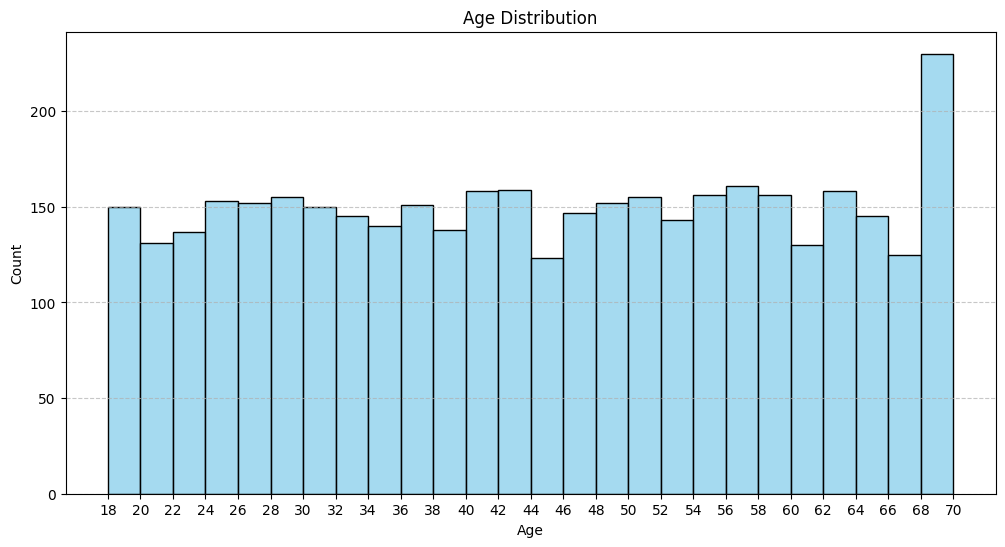

In [51]:
# Distribution by age
# Create a bar chart or histogram for age distribution
plt.figure(figsize=(12, 6))
sns.histplot(shopping_trends['Age'], bins=26, kde=False, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Adjusting x-axis ticks for better readability
plt.xticks(range(18, 71, 2))  # Adjust the range and step size based on your data

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

/var/folders/36/wyl27d_12zqbr4gkphgvr5_80000gn/T/ipykernel_81517/3314049893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data = shopping_trends, palette='pastel')


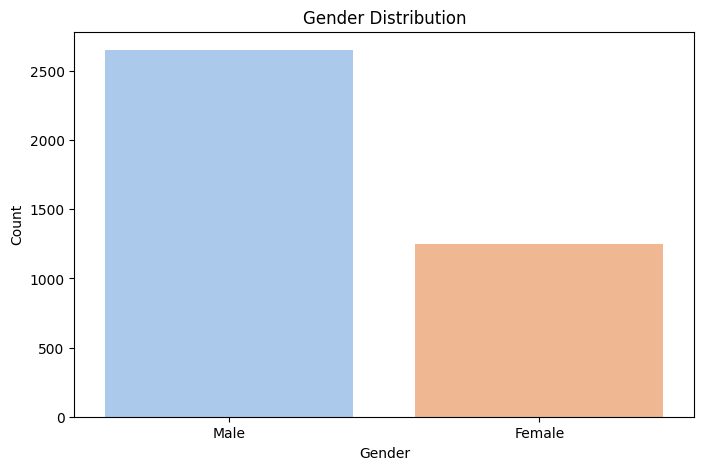

In [45]:
# Distribution by gender:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data = shopping_trends, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

##### How does the age distribution vary across different product categories?

There are 4 unique product categories:
1. Clothing
2. Footwear
3. Accessories
4. Outwear

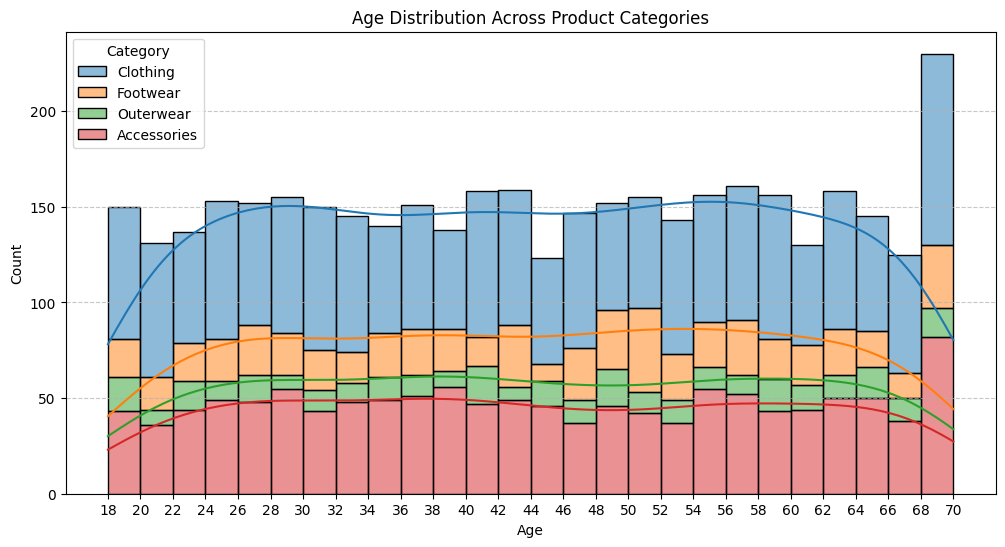

In [49]:
#
 
plt.figure(figsize=(12, 6))
sns.histplot(data = shopping_trends, x='Age', hue='Category', multiple='stack', bins=26, kde=True)
plt.title('Age Distribution Across Product Categories')
plt.xlabel('Age')
plt.ylabel('Count')

# Adjusting x-axis ticks for better readability
plt.xticks(range(18, 71, 2))  # Adjust the range and step size based on your data

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


##### Are there any specific locations where the majority of customers are located?

In [54]:
# Number of unique locations:
unique_locations = shopping_trends['Location'].nunique()
print("There are " + str(unique_locations) + " unique locations.")

print(shopping_trends['Location'].unique())

There are 50 unique locations.
['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 'New Mexico' 'South Carolina' 'Idaho' 'Pennsylvania' 'Connecticut' 'Utah'
 'Virginia' 'Georgia' 'Nebraska' 'Iowa' 'South Dakota' 'Minnesota'
 'Washington' 'Wisconsin' 'Michigan']


In [60]:
# Location counts. Showing the distribution of customers across locations.
location_counts = shopping_trends['Location'].value_counts()
print(location_counts)

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Ariz

In [64]:
# Percentage distribution

location_percentages = (shopping_trends['Location'].value_counts() / len(shopping_trends)) * 100
print(location_percentages)

Location
Montana           2.461538
California        2.435897
Idaho             2.384615
Illinois          2.358974
Alabama           2.282051
Minnesota         2.256410
Nebraska          2.230769
New York          2.230769
Nevada            2.230769
Maryland          2.205128
Delaware          2.205128
Vermont           2.179487
Louisiana         2.153846
North Dakota      2.128205
Missouri          2.076923
West Virginia     2.076923
New Mexico        2.076923
Mississippi       2.051282
Indiana           2.025641
Georgia           2.025641
Kentucky          2.025641
Arkansas          2.025641
North Carolina    2.000000
Connecticut       2.000000
Virginia          1.974359
Ohio              1.974359
Tennessee         1.974359
Texas             1.974359
Maine             1.974359
South Carolina    1.948718
Colorado          1.923077
Oklahoma          1.923077
Wisconsin         1.923077
Oregon            1.897436
Pennsylvania      1.897436
Washington        1.871795
Michigan          1

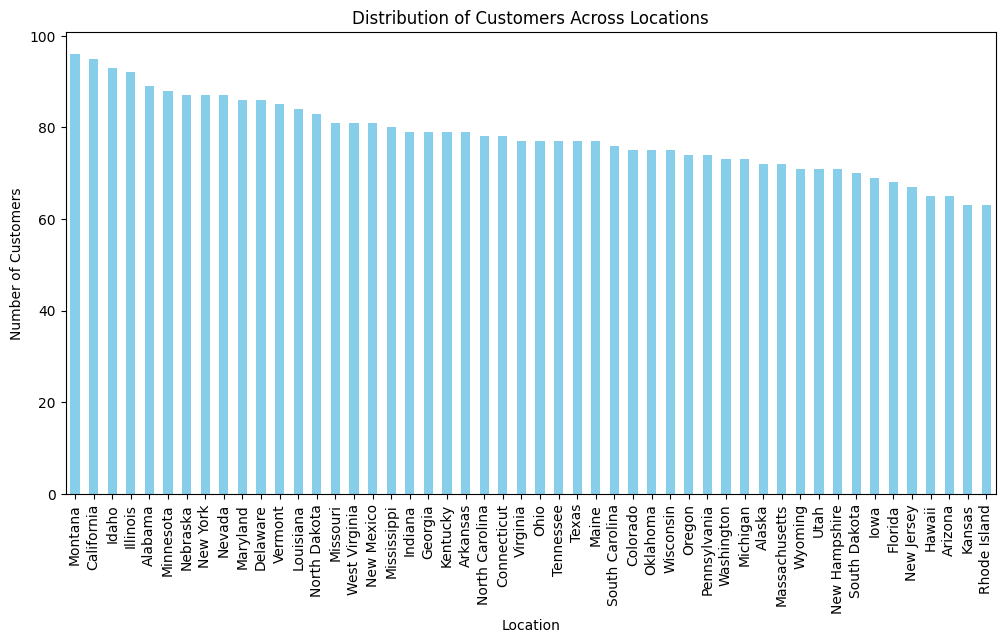

In [63]:
# Customer distribution across locations.

plt.figure(figsize=(12, 6))
location_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customers Across Locations')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.show()

## Purchase Patterns

##### What are the most purchased items or product categories?